In [143]:
import numpy as np           
import pandas as pd               
import matplotlib.pyplot as plt
import seaborn as sns


In [144]:
df = pd.read_csv('C:\\Github\\Credit_risk_analysis_with_ExplainableAI\\data\\raw\\credit_risk_dataset.csv')


In [145]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [147]:
df['loan_int_rate'].isnull().sum()

3116

In [148]:
df['loan_int_rate'].mean(skipna=True)

11.011694892245036

In [149]:
df['loan_int_rate'].median(skipna=True)

10.99

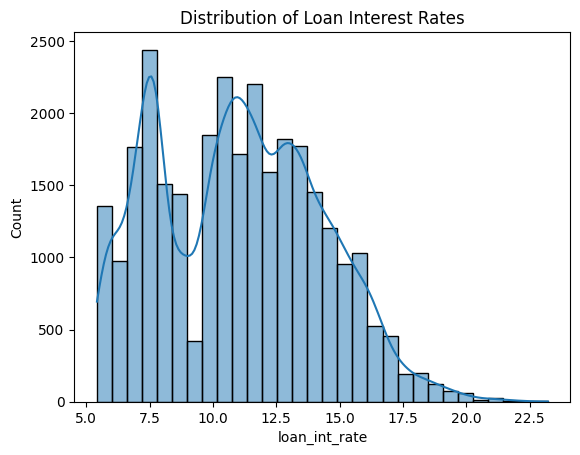

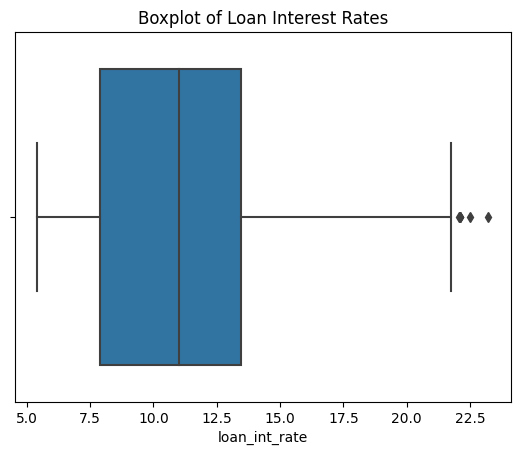

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['loan_int_rate'], kde=True, bins=30)
plt.title('Distribution of Loan Interest Rates')
plt.show()

# Boxplot for a quick view of outliers
sns.boxplot(x=df['loan_int_rate'])
plt.title('Boxplot of Loan Interest Rates')
plt.show()


In [151]:
skewness = df['loan_int_rate'].skew()
print("Skewness:", skewness)


Skewness: 0.2085503016908977


Outliers

In [152]:
Q1 = df['loan_int_rate'].quantile(0.25)
Q3 = df['loan_int_rate'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound : {lower_bound} , Upper Bound : {upper_bound}")

outliers = df[(df['loan_int_rate'] < lower_bound) | (df['loan_int_rate'] > upper_bound)]
print(outliers.count())

Lower Bound : -0.45500000000000007 , Upper Bound : 21.825000000000003
person_age                    6
person_income                 6
person_home_ownership         6
person_emp_length             6
loan_intent                   6
loan_grade                    6
loan_amnt                     6
loan_int_rate                 6
loan_status                   6
loan_percent_income           6
cb_person_default_on_file     6
cb_person_cred_hist_length    6
dtype: int64


In [153]:
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)

In [154]:
df['loan_int_rate'].isnull().sum()

0

In [155]:
df['loan_int_rate'].mean()

11.009620023940332

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [157]:
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [159]:
df.to_csv('updated_credit_risk_dataset-without_missing_values .csv', index=False)